<a href="https://colab.research.google.com/github/ssingh1187/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/Copy_of_Linear_Regression_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# King County Housing Data - Linear Regression Assignment

Data for this assignment was obtained from Kaggle: <https://www.kaggle.com/harlfoxem/housesalesprediction>

Complete the following challenges below to improve iteratively your home price estimation and practice implementing predictive linear regression models. 

# Bivariate Regression

Pick the X variable that you think will be the most correlated with Y. 

Split your dataset into a 20-80 test-train-split (80% of data for training, and 20% for testing).

Train a regression model using this single X and single Y variable. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your line of best fit to the graph.

Report your Root Mean Squared Error and R-Squared for this model.



In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/kc_house_data.csv')
pd.set_option('display.max_columns', 100)
print(df.shape)
df.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [2]:
# Splitting the data into 20-80 test_train_split

from sklearn.model_selection import train_test_split

Y = df[['price']].values
X = df[['sqft_living']].values

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)
X_train, X_test, Y_train, Y_test

(array([[1970],
        [2550],
        [1740],
        ...,
        [1790],
        [3900],
        [1160]]), array([[1970],
        [1460],
        [1690],
        ...,
        [1530],
        [2230],
        [3240]]), array([[ 268000.],
        [ 315000.],
        [ 425000.],
        ...,
        [ 515000.],
        [1072000.],
        [ 394000.]]), array([[540000.],
        [699999.],
        [260000.],
        ...,
        [500000.],
        [464950.],
        [975000.]]))

In [3]:
# Training a regression model

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,Y_train)

print('Slope Coefficient: ', model.coef_[0])
print('\nIntercept Value: ', model.intercept_)

Slope Coefficient:  [280.39524424]

Intercept Value:  [-44332.8832441]


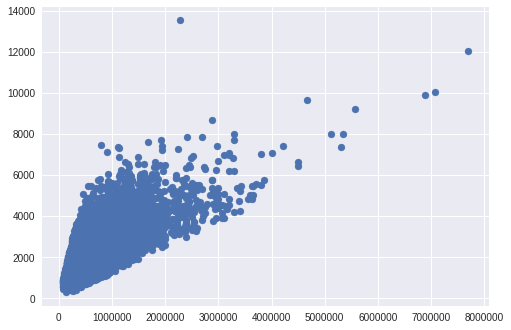

In [6]:
plt.scatter(df.price, df.sqft_living);

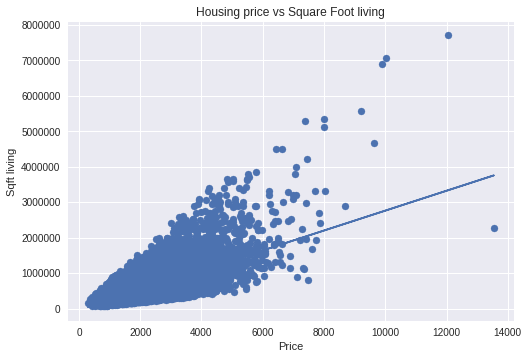

In [5]:
# Plotting

import matplotlib.pyplot as plt

m_hat = model.coef_[0]
b_hat = model.intercept_

# Plotting the points
plt.scatter(df.sqft_living, df.price)

# Plot the line
y_hat = [m_hat*x + b_hat for x in X]
plt.plot(X, y_hat)

# Graph axes and title
plt.xlabel('Price')
plt.ylabel('Sqft living')
plt.title('Housing price vs Square Foot living');

In [7]:
# To find RMSE and r2 error

import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# To find prediction value on test data and compare that to actual values
y_test_predict = model.predict(X_test)

RMSE = np.sqrt(mean_squared_error(Y_test, y_test_predict))
R2 = r2_score(Y_test, y_test_predict)

print("RMSE:", RMSE)
print('R^2:', R2)

RMSE: 273125.4721068339
R^2: 0.4707239424363905


# Two-variable Multiple Regression

To ramp up slowly, pick a second X variable that you think will be the most correlated with Y. 

Split your dataset into a 20-80 test-train-split (80% of data for training, and 20% for testing).

Train a regression model using these two X variables. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your **plane** of best fit to the graph.

Report your Root Mean Squared Error and R-squared for this model.

In [8]:
# Splitting the data into 20-80 test_train_split

Y1 = df.loc[:, ['price']].values
X1 = df.loc[:, ['sqft_living', 'sqft_lot']]

X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1,Y1,test_size=0.2)
X1_train, X1_test, Y1_train, Y1_test

(       sqft_living  sqft_lot
 19149         2480     15022
 114           3230     16171
 15899         1700      3575
 5674          2090      5289
 3776          3180      9375
 15025         1290       886
 14006         1970     15743
 2486          2980     16263
 4231          2010      3600
 13262         3740     32481
 7510          2180      7560
 8011          2070      9822
 14918         3280      4000
 1843          2610      8760
 19594         3750    218506
 17419         1080     10639
 1668          1810      2159
 20199         2710      4685
 10689         2550      7555
 8993          2340     51836
 3644          1770      6014
 4423          3020      5868
 8182          1810     11205
 3425          1200      5029
 14616         1880      9880
 21002         1540      9714
 285           2720      8666
 11022         1700      4165
 11632         1880      5752
 15207         1830      6643
 ...            ...       ...
 12133         2110      6820
 20830    

In [9]:
model = LinearRegression()
model.fit(X1_train,Y1_train)

beta_0 = model.intercept_
beta_i = model.coef_[0]

print('Slope Coefficient: ', beta_i)
print('\nIntercept Value: ', beta_0)

Slope Coefficient:  [281.82796539  -0.29057746]

Intercept Value:  [-41594.82097429]


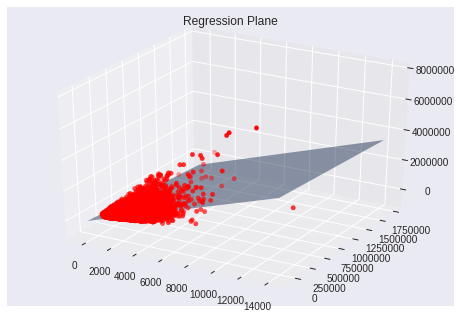

In [10]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot Points on 3D plot
ax.scatter(df['sqft_living'], df['sqft_lot'], df['price'],c='red')

# Set axes to size of scatter data
x1 = np.array(ax.get_xlim())
y1 = np.array(ax.get_ylim())
xx, yy = np.meshgrid(x1,y1)
zz = beta_i[0]*xx + beta_i[1]*yy + beta_0[0]

# Plot Plane
plt3d = plt.gca(projection='3d')

# Add Opacity to Plane 
plt3d.plot_surface(xx, yy, zz,alpha=0.5)
plt.title("Regression Plane")

plt.show()

In [12]:
# To find RMSE and r2 error

import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# To find prediction value on test data and compare that to actual values
y1_test_predict = model.predict(X1_test)

RMSE1 = np.sqrt(mean_squared_error(Y1_test, y1_test_predict))
R2_1 = r2_score(Y1_test, y1_test_predict)

print("RMSE1:", RMSE)
print('R^2_1:', R2)

RMSE1: 273125.4721068339
R^2_1: 0.4707239424363905


# Multiple Regression

Now using all available X variables, split your data into test and training datasets, train your model, obtain its coefficients, and report the Root Mean Squared Error (lowest possible )and R-squared values (highest possible).

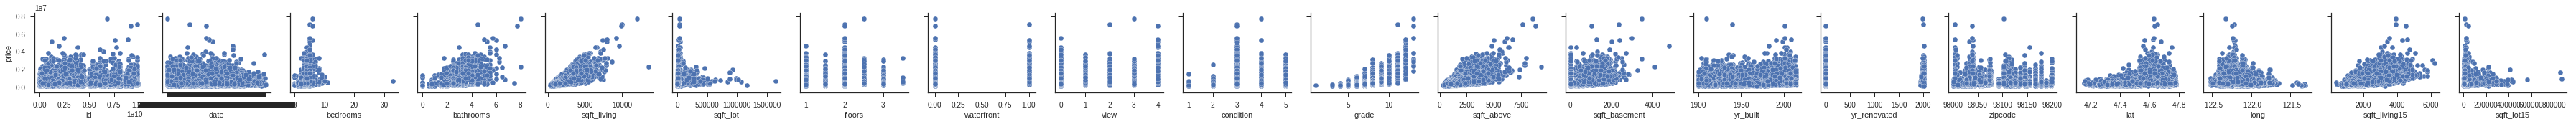

In [13]:
import seaborn as sns

sns.set(style = 'ticks', color_codes = True)

# Generate a list of column headers not including the price
x_columns = df.columns.drop('price')

# Only plot scatter plot of x variables with our y variable
fig = sns.pairplot(data=df, y_vars = ['price'], x_vars = x_columns)


In [14]:
Y2 = df['price']
X2 = df.drop(['price', 'date'], axis=1)

X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.2)

print(X2_train.shape)
print(X2_test.shape) 
print(Y2_train.shape)
print(Y2_test.shape)

(17290, 19)
(4323, 19)
(17290,)
(4323,)


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [16]:
model.fit(X2_train,Y2_train)

beta_0 = model.intercept_
beta_i = model.coef_[0]

print('Slope Coefficient: ', beta_i)
print('\nIntercept Value: ', beta_0)

Slope Coefficient:  -1.0438443667981167e-06

Intercept Value:  7218457.845156581


In [17]:
# To find RMSE and r2 error

import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# To find prediction value on test data and compare that to actual values
y2_test_predict = model.predict(X2_test)

RMSE1 = np.sqrt(mean_squared_error(Y2_test, y2_test_predict))
R2_2 = r2_score(Y2_test, y2_test_predict)

print("RMSE1:", RMSE)
print('R^2_2:', R2)

RMSE1: 273125.4721068339
R^2_2: 0.4707239424363905


# Stretch Goals

Pick from these stretch goals the tasks that you feel like will be the most beneficial for you. 

- Start to research Polynomial Regression and Log-Linear Regression (tomorrow's topics). Find a new regression dataset and try to implement one of these models. 
- Research "Feature Engineering" see what features you can engineer on the above dataset. How much are you able to improve your accuracy with feature engineering?
- Explore the concept of $R^2$, learn how it is calculated and how it relates to covariance, correlation, and variance. 
- Further explore the concept of "Model Validation" - we'll spend a whole week on this soon. What other measures of model accuracy could we have used besides Root Mean Squared Error?
- AMES Housing Prediction Kaggle Competition: <https://www.kaggle.com/c/house-prices-advanced-regression-techniques>
- **WRITE A BLOG POST** explaining the basics of Linear Regression.

Remember to share your findings in the slack channel. :)
